In [2]:
# the bare minimum
import matplotlib.pyplot as plt  # for plotting
import geopandas as gpd  # for geospatial data handling
from matplotlib.lines import Line2D

# more advanced
from lonboard._map import Map
from lonboard._layer import PolygonLayer  # for mapping in 3D
from lonboard.colormap import (
    apply_categorical_cmap,
    apply_continuous_cmap,
)  # for assigning colors
from palettable.colorbrewer.sequential import PuRd_9  # for color palettes
from matplotlib.colors import LogNorm  # for logarithmic normalization
import pygwalker as pyg  # for creating interactive data visualizations

In [3]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('../Data/parcels__2024_.csv')
df.head()

/tmp/ipykernel_7835/3166286335.py:4: DtypeWarning: Columns (1,6,7,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Data/parcels__2024_.csv')


,OID_,MAP_PAR_ID,LOC_ID,POLY_TYPE,MAP_NO,SOURCE,PLAN_ID,BND_CHK,NO_MATCH,TOWN_ID,last_edited_date,created_user,created_date,last_edited_user,Shape_Length,Shape_Area,shape_wkt
0,1,107062500,F_799998_2955292,FEE,1.0,ASSESS,NaN,NaN,N,35,11/7/2019 0:00:00,NaN,NaN,NaN,0.004526,5.296804e-07,NaN
1,2,107069000,F_810842_2942136,FEE,1.0,ASSESS,NaN,NaN,N,35,11/7/2019 0:00:00,NaN,NaN,NaN,0.017822,1.725046e-05,NaN
2,3,107073100,F_794811_2942749,FEE,1.0,ASSESS,NaN,NaN,N,35,11/7/2019 0:00:00,NaN,NaN,NaN,0.001975,2.419783e-07,MULTIPOLYGON (((-70.987074366999934 42.3221099...
3,4,107071000,F_794865_2944326,FEE,1.0,ASSESS,NaN,NaN,N,35,11/7/2019 0:00:00,NaN,NaN,NaN,0.020309,2.072160e-05,NaN
4,5,107073000,F_795068_2942368,FEE,1.0,ASSESS,NaN,NaN,N,35,11/7/2019 0:00:00,NaN,NaN,NaN,0.009294,5.140685e-06,NaN


In [4]:
# Get summary statistics
df.info()
df.describe(include='all')

# Show column names
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98845 entries, 0 to 98844
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OID_              98845 non-null  int64  
 1   MAP_PAR_ID        98845 non-null  object 
 2   LOC_ID            98845 non-null  object 
 3   POLY_TYPE         98845 non-null  object 
 4   MAP_NO            98682 non-null  float64
 5   SOURCE            98845 non-null  object 
 6   PLAN_ID           14 non-null     object 
 7   BND_CHK           291 non-null    object 
 8   NO_MATCH          98845 non-null  object 
 9   TOWN_ID           98845 non-null  int64  
 10  last_edited_date  98845 non-null  object 
 11  created_user      8 non-null      object 
 12  created_date      8 non-null      object 
 13  last_edited_user  238 non-null    object 
 14  Shape_Length      98845 non-null  float64
 15  Shape_Area        98845 non-null  float64
 16  shape_wkt         87569 non-null  object

In [5]:
# Check for columns that might contain spatial data
spatial_cols = [col for col in df.columns if 'geom' in col.lower() or 'lat' in col.lower() or 'lon' in col.lower()]
print("Potential spatial columns:", spatial_cols)

Potential spatial columns: []


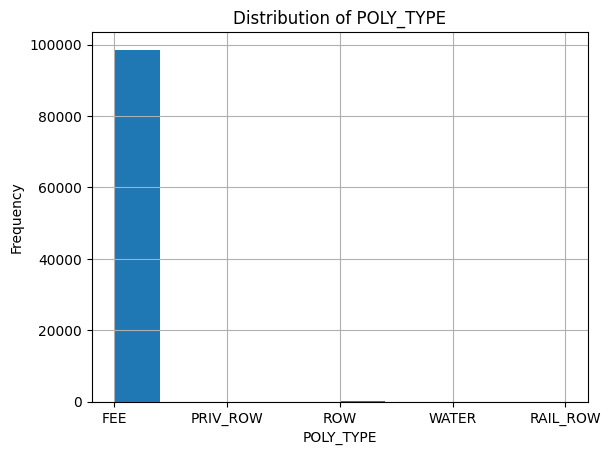

In [8]:
import matplotlib.pyplot as plt

# Plot a histogram of a numeric column (replace 'column_name' with a real column)
df['POLY_TYPE'].hist()
plt.xlabel('POLY_TYPE')
plt.ylabel('Frequency')
plt.title('Distribution of POLY_TYPE')
plt.show()

In [9]:
import geopandas as gpd

# If there's a geometry column (e.g., WKT or GeoJSON), convert to GeoDataFrame
if 'geometry' in df.columns:
    gdf = gpd.GeoDataFrame(df, geometry=gpd.GeoSeries.from_wkt(df['geometry']))
    gdf.plot()
    plt.show()
elif 'lat' in df.columns and 'lon' in df.columns:
    import folium
    m = folium.Map(location=[df['lat'].mean(), df['lon'].mean()], zoom_start=12)
    for _, row in df.iterrows():
        folium.CircleMarker([row['lat'], row['lon']], radius=2).add_to(m)
    m

In [12]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt

In [14]:
from shapely import wkt

def safe_wkt_loads(val):
    if isinstance(val, str):
        return wkt.loads(val)
    else:
        return None

df['geometry'] = df['shape_wkt'].apply(safe_wkt_loads)
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs='EPSG:4326')

In [16]:
print(gdf.info())
print(gdf['POLY_TYPE'].value_counts())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 98845 entries, 0 to 98844
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   OID_              98845 non-null  int64   
 1   MAP_PAR_ID        98845 non-null  object  
 2   LOC_ID            98845 non-null  object  
 3   POLY_TYPE         98845 non-null  object  
 4   MAP_NO            98682 non-null  float64 
 5   SOURCE            98845 non-null  object  
 6   PLAN_ID           14 non-null     object  
 7   BND_CHK           291 non-null    object  
 8   NO_MATCH          98845 non-null  object  
 9   TOWN_ID           98845 non-null  int64   
 10  last_edited_date  98845 non-null  object  
 11  created_user      8 non-null      object  
 12  created_date      8 non-null      object  
 13  last_edited_user  238 non-null    object  
 14  Shape_Length      98845 non-null  float64 
 15  Shape_Area        98845 non-null  float64 
 16  shape_wkt     

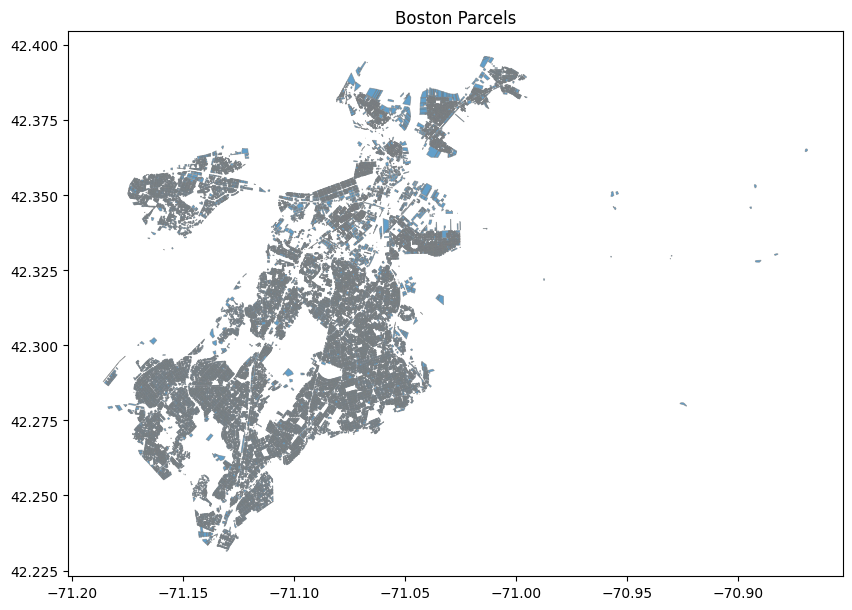

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, linewidth=0.5, edgecolor='gray', alpha=0.7)
ax.set_title("Boston Parcels")
plt.show()

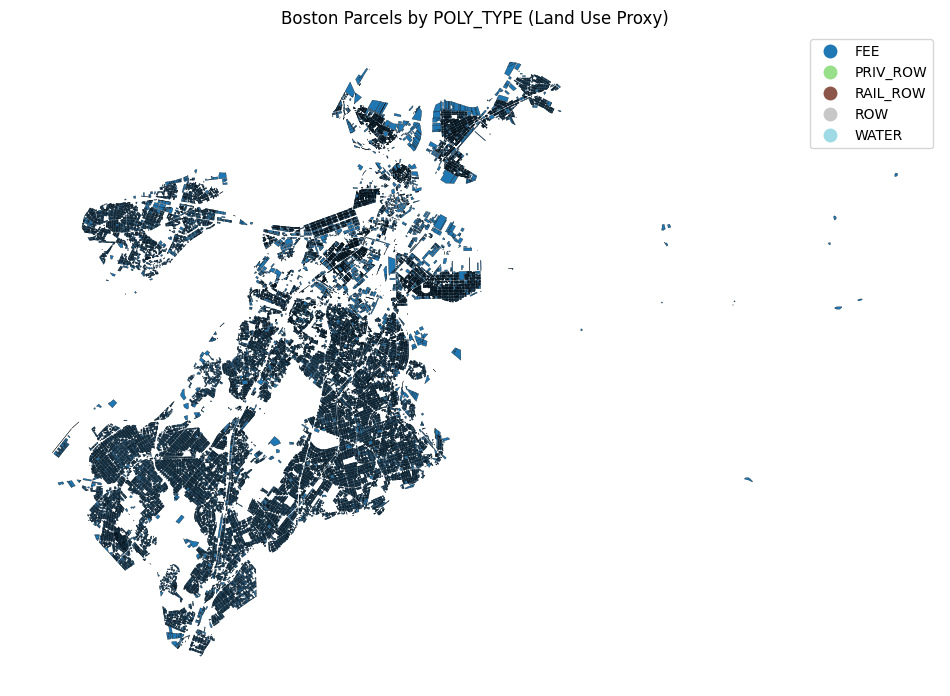

In [18]:
fig, ax = plt.subplots(figsize=(12, 10))
gdf.plot(column='POLY_TYPE', ax=ax, legend=True, cmap='tab20', linewidth=0.2, edgecolor='black')
ax.set_title("Boston Parcels by POLY_TYPE (Land Use Proxy)")
plt.axis('off')
plt.show()

In [19]:
import folium

# Get centroid for map center
centroid = gdf.geometry.centroid.unary_union.centroid
m = folium.Map(location=[centroid.y, centroid.x], zoom_start=12)

# Add parcels (simplified for performance)
folium.GeoJson(gdf[['geometry', 'POLY_TYPE']].sample(1000)).add_to(m)  # Sample for speed

m

/tmp/ipykernel_7835/3010014488.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.unary_union.centroid
/tmp/ipykernel_7835/3010014488.py:4: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  centroid = gdf.geometry.centroid.unary_union.centroid


In [20]:
from lonboard._map import Map
from lonboard._layer import PolygonLayer

In [25]:
from lonboard.colormap import apply_categorical_cmap
from palettable.colorbrewer.qualitative import Set3_12

# Get unique categories
categories = gdf["POLY_TYPE"].astype("category").cat.categories
# Map each category to a color
color_dict = {cat: Set3_12.mpl_colors[i % len(Set3_12.mpl_colors)] for i, cat in enumerate(categories)}

# Now use the mapping
color = apply_categorical_cmap(gdf["POLY_TYPE"], cmap=color_dict)

layer = PolygonLayer.from_geopandas(
    gdf,
    get_fill_color=color,
    tooltip=["MAP_PAR_ID", "POLY_TYPE"],
    opacity=0.6,
)

ArrowInvalid: ("Could not convert '1402711000' with type str: tried to convert to int64", 'Conversion failed for column MAP_PAR_ID with type object')

In [23]:
import matplotlib.pyplot as plt
color = apply_categorical_cmap(gdf["POLY_TYPE"], cmap=plt.cm.tab20.colors)

TypeError: tuple indices must be integers or slices, not str

In [22]:
from lonboard._layer import PolygonLayer
from lonboard.colormap import apply_categorical_cmap

# Optionally, create a color mapping for POLY_TYPE
color = apply_categorical_cmap(gdf["POLY_TYPE"])

layer = PolygonLayer.from_geopandas(
    gdf,
    get_fill_color=color,
    tooltip=["MAP_PAR_ID", "POLY_TYPE"],
    opacity=0.6,
)

TypeError: apply_categorical_cmap() missing 1 required positional argument: 'cmap'